<a href="https://colab.research.google.com/github/luegl/keras-distinguish-own-cat-from-others-model/blob/main/predict_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, callbacks
import tensorflow as tf

Setup for image preprocessing and augmentation with
ImageDataGenerator, including resizing, normalization, and various augmentation techniques.


In [7]:
IMG_SIZE = (180, 180)
IMG_SIZE_ = 180
BATCH_SIZE = 16

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

The train_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the training subset. It does not store all images, only those that are currently needed.

In [8]:
train_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

Found 511 images belonging to 2 classes.


The val_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the validation subset. It does not store all images, only those that are currently needed.

In [9]:
val_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other",
    target_size= IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 126 images belonging to 2 classes.


Prints class labels and displays a batch of images with their corresponding labels in a grid.

Class names: {'flaekli': 0, 'other_cats': 1}


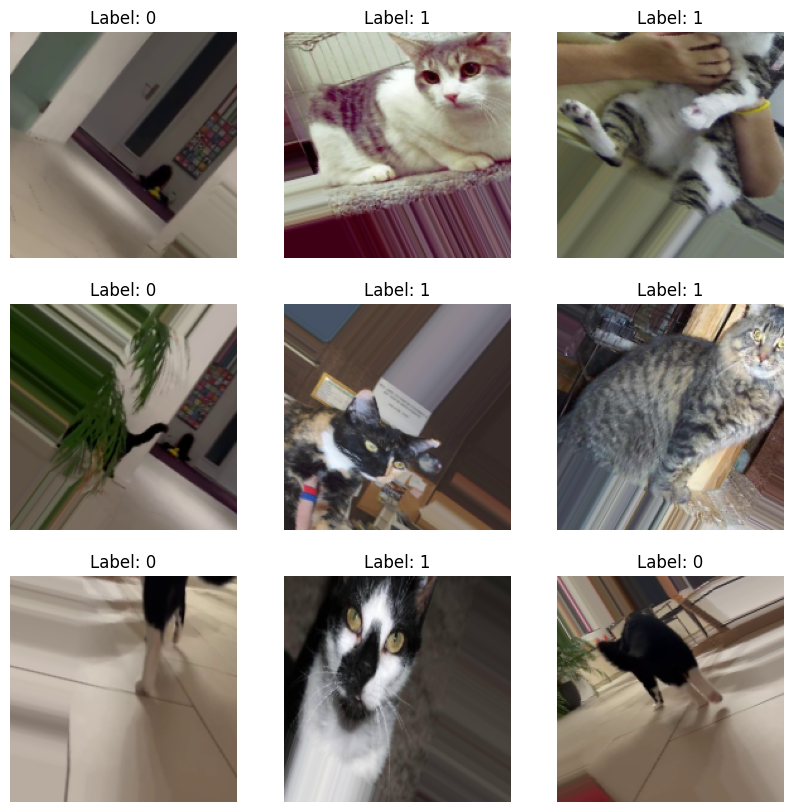

In [ ]:
print("Class names:", train_generator.class_indices)

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()

Build model


In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(IMG_SIZE_, IMG_SIZE_, 3), include_top=False, weights="imagenet")
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=base_model.input, outputs=x)


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#checkpoint = callbacks.ModelCheckpoint("cat_model.keras", save_best_only=False, monitor="val_loss")

<ipython-input-13-2726817bd12f>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(IMG_SIZE_, IMG_SIZE_, 3), include_top=False, weights="imagenet")


Train model


In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=5)

model_path = "/content/drive/MyDrive/repos/keras-distinguish-own-cat-from-others-model/models/model.keras"

model.save(model_path, save_format="keras")

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 849ms/step - accuracy: 0.9796 - loss: 0.0623 - val_accuracy: 0.7698 - val_loss: 0.8564
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 916ms/step - accuracy: 0.9779 - loss: 0.0535 - val_accuracy: 0.7381 - val_loss: 0.9264
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 940ms/step - accuracy: 0.9916 - loss: 0.0278 - val_accuracy: 0.7302 - val_loss: 1.4574
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 843ms/step - accuracy: 0.9803 - loss: 0.0611 - val_accuracy: 0.7302 - val_loss: 1.2961
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 763ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.7619 - val_loss: 1.0521


Test model

In [10]:
model = tf.keras.models.load_model(model_path)

loss, accuracy = model.evaluate(val_generator)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8010 - loss: 0.9664
Test Loss: 1.0023415088653564
Test Accuracy: 0.7936508059501648
